             001  002  003  004  005  006  007  008  009  010  ...  158  159  \
Date                                                           ...             
2019-01-01  1062   33   67   42    0    4    0    0    1   69  ...    0    0   
2019-01-02   976   41   72   19    2    0    0   14    1   62  ...    5    0   
2019-01-03   956   27   71   28    4    6   11    0    0   64  ...    0    0   
2019-01-04   976   30   57   29    0    0    3    0    2   52  ...    0    2   
2019-01-05   956   45   65   27    4    1    0    0    0   55  ...   12    0   

            160  161  162  163  164  165  166  167  
Date                                                
2019-01-01    4    0   10    2    2    2    0    0  
2019-01-02    0    7    0    0    0    0    1    3  
2019-01-03    0    0    6    0    0    3    0    0  
2019-01-04    0    0    0    0    0    0    0    7  
2019-01-05    0    4    0    0    0    0    5    2  

[5 rows x 167 columns]
           Size    Hits      Revenue  Viewin

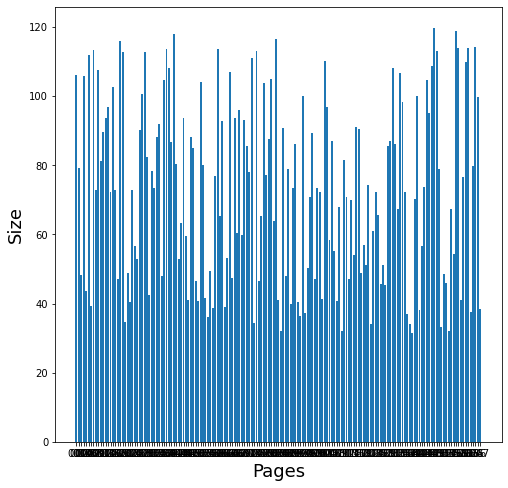

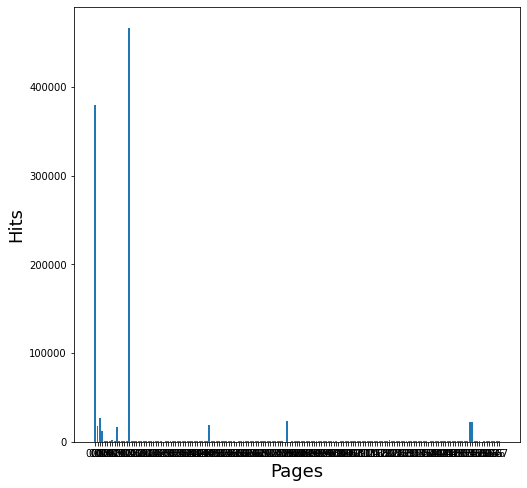

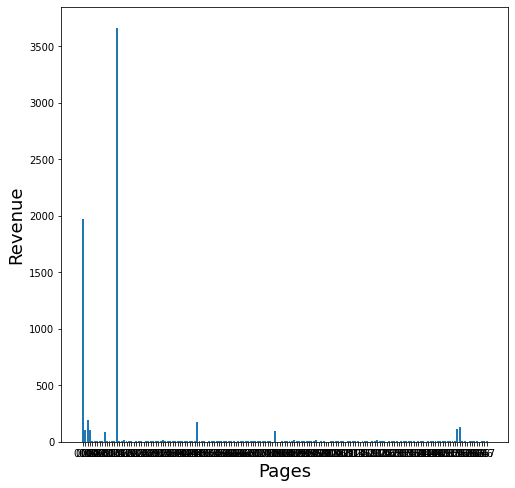

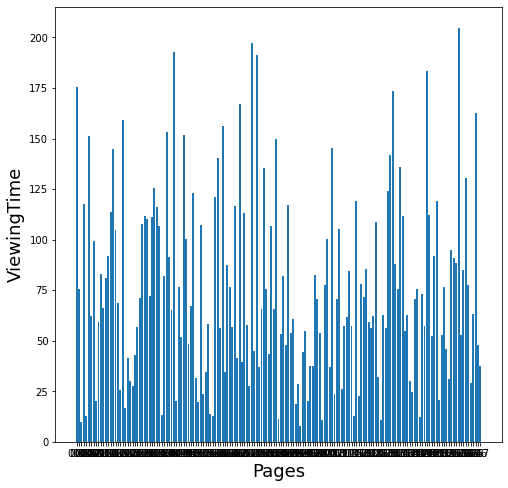

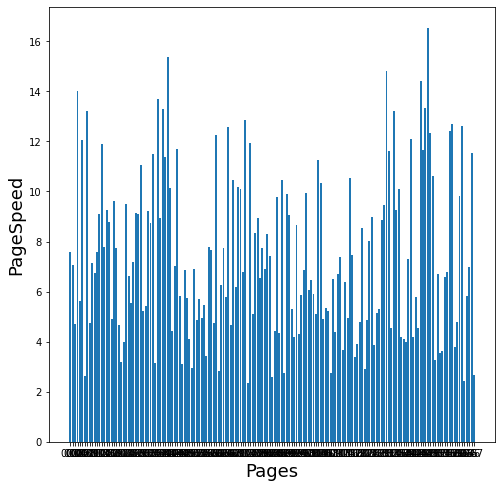

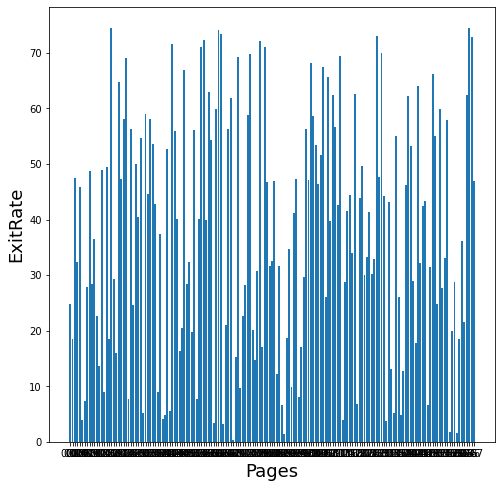

In [ ]:
# question 1  and 2 
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

data = pd.read_csv('https://tinyurl.com/ChrisCoDV/Pages/DailyHits.csv', index_col=0)
print(data.head())

exit_rate_per_page = pd.read_csv('https://tinyurl.com/ChrisCoDV/Pages/PageExitRate.csv', index_col=0)
total_revenue_per_page = pd.read_csv('https://tinyurl.com/ChrisCoDV/Pages/PageRevenue.csv', index_col=0)
html_content_size_per_page = pd.read_csv('https://tinyurl.com/ChrisCoDV/Pages/PageSize.csv', index_col=0)
download_speed_per_page = pd.read_csv('https://tinyurl.com/ChrisCoDV/Pages/PageSpeed.csv', index_col=0)
page_viewing_time = pd.read_csv('https://tinyurl.com/ChrisCoDV/Pages/PageViewingTime.csv', index_col=0)

summary_data = pd.DataFrame(index=data.columns)
summary_data['Size'] = html_content_size_per_page.values
summary_data['Hits']=data.sum().values
summary_data['Revenue'] = total_revenue_per_page.values
summary_data['ViewingTime'] = page_viewing_time.values
summary_data['PageSpeed'] = download_speed_per_page.values
summary_data['ExitRate'] = exit_rate_per_page.values
print(summary_data.head())
print(summary_data.describe())

for attribute in summary_data:
    plt.figure(figsize=(8, 8))
    x_pos = np.arange(len(summary_data.index))
    plt.bar(x_pos, summary_data[attribute], align='center')
    plt.xticks(x_pos, summary_data.index)
    plt.xlabel('Pages', fontsize=18)
    plt.ylabel(attribute, fontsize=18)
    plt.show()



         Size      Hits   Revenue  ViewingTime  PageSpeed  ExitRate
001  0.885814  0.812809  0.537839     0.856381   0.459396  0.332090
002  0.662165  0.037251  0.027773     0.368419   0.427855  0.247583
003  0.402281  0.058334  0.053493     0.048950   0.284958  0.637354
004  0.882106  0.024978  0.027996     0.575038   0.845852  0.433969
005  0.363771  0.001141  0.000835     0.061126   0.339838  0.614691


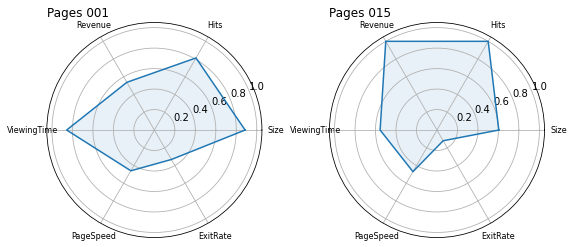

In [ ]:

#question 3
normalised_data = summary_data / summary_data.max()
print(normalised_data.head())

selected = ['001', '015']

n_attributes = len(normalised_data.columns)
angles = [n / float(n_attributes) * 2 * np.pi for n in range(n_attributes + 1)]
plt.figure(figsize=(8, 8))
counter = 1
for name in selected:
    values = normalised_data.loc[[name]].values.flatten().tolist()
    values += values[:1]
    sub = plt.subplot(2, 2, counter, polar=True)
    sub.plot(angles, values)
    sub.fill(angles, values, alpha=0.1)
    sub.set_ylim(ymax=1.05)
    sub.set_yticks([0.2, 0.4, 0.6, 0.8, 1.0])
    sub.set_xticks(angles[0:-1])
    sub.set_xticklabels(normalised_data.columns, fontsize=8)
    sub.set_title('Pages ' + name, fontsize=12, loc='left')
    counter += 1
plt.tight_layout()
plt.show()



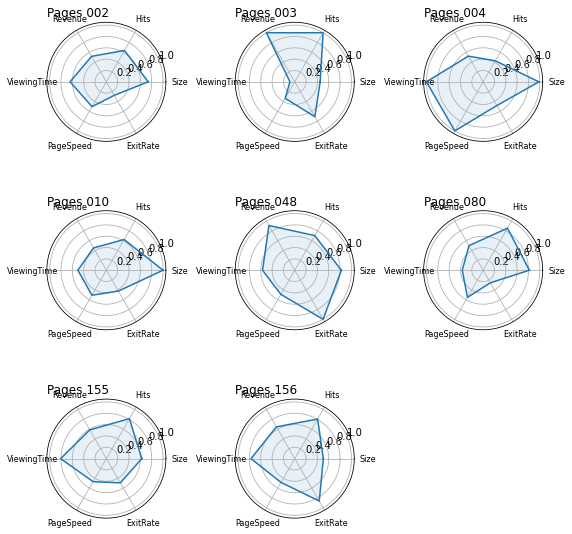

In [ ]:
#question 4
selected = ['002', '003','004','010','048','080','155','156']
normalised_data = summary_data / summary_data.loc[selected].max()
n_attributes = len(normalised_data.columns)
angles = [n / float(n_attributes) * 2 * np.pi for n in range(n_attributes + 1)]
plt.figure(figsize=(8, 8))
counter = 1
for name in selected:
    values = normalised_data.loc[[name]].values.flatten().tolist()
    values += values[:1]
    sub = plt.subplot(3, 3, counter, polar=True)
    sub.plot(angles, values)
    sub.fill(angles, values, alpha=0.1)
    sub.set_ylim(ymax=1.05)
    sub.set_yticks([0.2, 0.4, 0.6, 0.8, 1.0])
    sub.set_xticks(angles[0:-1])
    sub.set_xticklabels(normalised_data.columns, fontsize=8)
    sub.set_title('Pages ' + name, fontsize=12, loc='left')
    counter += 1
plt.tight_layout()
plt.show()



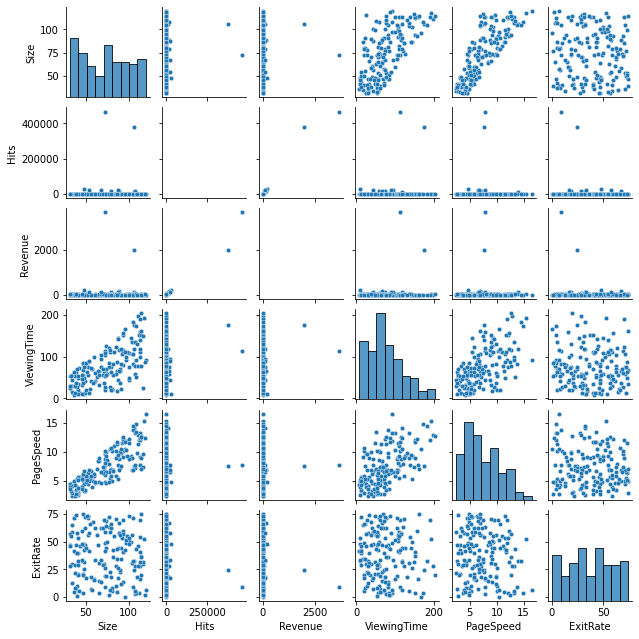

In [ ]:

#Question 5
import seaborn as sns
sns.pairplot(summary_data, height=1.5, plot_kws={'s': 20})
plt.show()


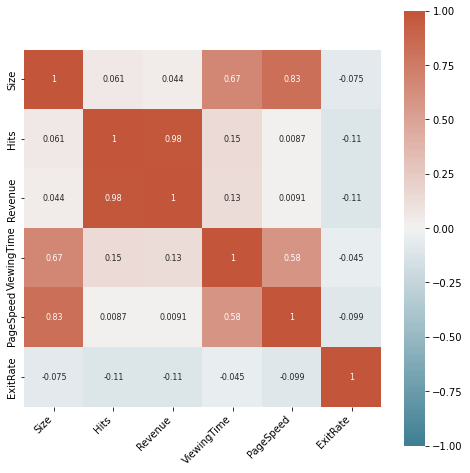

In [ ]:
plt.figure(figsize=(8, 8))
corr = summary_data.corr()
ax = sns.heatmap(corr, vmin=-1, vmax=1, center=0, cmap=sns.diverging_palette(220, 20, n=200), square=True, annot=True,
                 annot_kws={"size": 8})
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()



TypeError: ignored

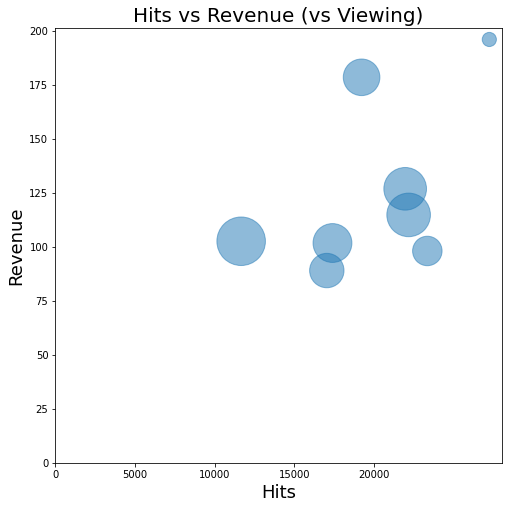

In [ ]:

selected = ['002','003','004','010','048','080','155','156']
summary_data=summary_data.loc[selected]
summary_data['BubbleSize'] = summary_data['ViewingTime'] * 20

plt.figure(figsize=(8, 8))
plt.scatter(summary_data['Hits'], summary_data['Revenue'], s=summary_data['BubbleSize'], alpha=0.5)
plt.xticks([0, 5000, 10000, 15000, 20000])
plt.yticks([0, 25, 50, 75, 100,125,150,175,200])
plt.title('Hits vs Revenue (vs Viewing)', fontsize=20)
plt.xlabel('Hits', fontsize=18)
plt.ylabel('Revenue', fontsize=18)
for i, name in enumerate(summary_data.index):
  plt.annotate(name +"(" + str(summary_data['ViewingTime'][i])+"s)", summary_data['Hits'][i],summary_data['Revenue'][i])
#plt.plot([0, 50], [0, 50], linestyle=':', color='r', label='price = cost (zero profit)')
plt.legend(loc=2)
plt.show()
